![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import re
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/world-capitals-gps/concap.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
10228,id_2946,Vienna,NaN,2948.0,NaN,6.0,"[[], []]",/Restaurant_Review-g190454-d8319709-Reviews-Ga...,d8319709,1,4.0
7398,id_7398,Rome,"['Italian', 'Pizza']",4675.0,$,44.0,"[['Thin and crispy pizza!', 'Good pizza'], ['0...",/Restaurant_Review-g187791-d4107849-Reviews-Pi...,d4107849,0,0.0
14165,id_1376,Brussels,"['Bar', 'Pub']",1371.0,$,5.0,"[['Great coffee - quiet atmosphere', 'Coffee m...",/Restaurant_Review-g188644-d10798765-Reviews-V...,d10798765,1,5.0
17634,id_6623,Paris,['French'],6624.0,$$ - $$$,71.0,"[['Nice neighborhood spot', 'Good terrace, fri...",/Restaurant_Review-g187147-d6899324-Reviews-La...,d6899324,1,3.5
20258,id_4865,Barcelona,"['Italian', 'Pizza', 'Fast Food', 'Delicatesse...",4866.0,$,3.0,"[[], []]",/Restaurant_Review-g187497-d13302247-Reviews-R...,d13302247,1,4.5


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [15]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [16]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [17]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

Обработаем оставшиеся NaN признаки

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
Restaurant_id              50000 non-null object
City                       50000 non-null object
Cuisine Style              38410 non-null object
Ranking                    50000 non-null float64
Price Range                32639 non-null object
Number of Reviews          50000 non-null float64
Reviews                    49998 non-null object
URL_TA                     50000 non-null object
ID_TA                      50000 non-null object
sample                     50000 non-null int64
Rating                     50000 non-null float64
Number_of_Reviews_isNAN    50000 non-null uint8
dtypes: float64(3), int64(1), object(7), uint8(1)
memory usage: 4.2+ MB


**City**

В базовом примере далее обрабатывается поле City (pd.get_dummies(data, columns=[ 'City',], dummy_na=True)) с параметром dummy_na=True (параметр отвечает за создание отдельного признака, если в поле City пропуск - создается отдельное поле с указанием, что есть пропущенное значение). Поэтому поле City не обрабатываем.НО: в поле City отсутствуют пропуски, поэтому при переносе данных необходимо учесть, что dummy_na=True здесь избыточно, и поэтому нам не надо будет так переносить в базовую функцию  

PS Так как в предобработке мы используем get_dammes, столбец City уйдет, поэтому новые переменные на основе этого столбца должны быть созданы до применения метода get_dummes

**Новая переменная**

На лекции была подсказска, что можно попробовать привязать рейтинг к населению города.
Мы же попробуем просмотреть влияние статуса города как столицы страны к рейтингу: через столицу больше туристический поток и предполагается, что рейтинг будет правдивее.
На платформе есть DataSet со списком столиц и их координатами world-capitals-gps. Загрузим его и сделаем в таблице data признак cap (0/1) где 1 - ресторан находиться в столице.

In [19]:
df_cap = pd.read_csv('../input/world-capitals-gps/concap.csv')
# Предобработкой убедились, что в таблице есть пропуски - уберем
df_cap.dropna(inplace=True)
# Есть дубликатыю Например Иерусалим - столица 2-х стран. Уберем
df_cap.drop_duplicates(subset=['CapitalName'],inplace=True)
# Соединим таблицы 
df1=df_cap.merge(data,how='inner',left_on='CapitalName', right_on='City')
# Опаньки, уникального ключа то нет... 
# Даже идентификатор ресторана в TA повторяется в таблице


In [20]:
# Сделаем список из столиц и новое поле в data с признаком столицы
cap_list = []
for i in range(len(df_cap)):
    cap_list.append(df_cap.iloc[i]['CapitalName'])
len(cap_list) # 235 столиц

235

In [21]:
def is_cap(cell):
    if cell in cap_list:
        return 1
    else:
        return 0

    
data['is_cap']=data['City'].apply(is_cap)

Теперь проверим 

In [22]:
data[data.is_cap==0].head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,is_cap
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0,0
11,id_11,Milan,['Italian'],4234.0,$$ - $$$,36.0,"[['GREAT APERITIVO WITH STYLE', 'Disappointing...",/Restaurant_Review-g187849-d7209625-Reviews-M_...,d7209625,0,0.0,0,0
12,id_12,Munich,['Greek'],1987.0,$,10.0,[['You always feel very Welcome at this cozy.....,/Restaurant_Review-g187309-d958943-Reviews-Wro...,d958943,0,0.0,0,0
13,id_13,Hamburg,NaN,1000.0,NaN,30.0,"[['Surprisingly good pizza', 'Yummy'], ['09/28...",/Restaurant_Review-g187331-d1344523-Reviews-Il...,d1344523,0,0.0,0,0
16,id_16,Milan,"['Pizza', 'Vegetarian Friendly', 'Vegan Options']",1825.0,$$ - $$$,322.0,"[['truly Neapolitan pizza, new/slick location'...",/Restaurant_Review-g187849-d11850449-Reviews-P...,d11850449,0,0.0,0,0


**Price Range**

Цены в ресторане в 3 категориях. Этот признак обработаем по аналогии с City, сейчас обрабатывать пропуски не будем 

**Cuisine Style**

В поле есть пропуски, но поле составное, и его необходимо дополнительно обрабатывать. Поэтому пропуски заменяем на значение "not_inf" 

In [23]:
data['Cuisine Style'].fillna('not_inf', inplace = True)

**Number of Reviews, URL_TA, ID_TA **

Пропусков нет и обработка не нужна  

**Reviews**

Есть пропуски, по аналогии с Cuisine Style поставим "not_inf"  

In [24]:
data['Reviews'].fillna('not_inf', inplace = True)

In [25]:
# Убедимся, что нет пропусков, исключение Price Range (обработаем позже)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
Restaurant_id              50000 non-null object
City                       50000 non-null object
Cuisine Style              50000 non-null object
Ranking                    50000 non-null float64
Price Range                32639 non-null object
Number of Reviews          50000 non-null float64
Reviews                    50000 non-null object
URL_TA                     50000 non-null object
ID_TA                      50000 non-null object
sample                     50000 non-null int64
Rating                     50000 non-null float64
Number_of_Reviews_isNAN    50000 non-null uint8
is_cap                     50000 non-null int64
dtypes: float64(3), int64(2), object(7), uint8(1)
memory usage: 4.6+ MB


### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [26]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
is_cap                         2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [27]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [28]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
33222,id_7645,['Pizza'],7646.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187497-d6171494-Reviews-Pi...,d6171494,1,3.0,...,0,0,0,0,0,0,0,0,0,0
1761,id_1761,['Pizza'],2966.0,NaN,6.0,"[[], []]",/Restaurant_Review-g187849-d7708520-Reviews-Pi...,d7708520,0,0.0,...,0,0,0,0,0,0,0,0,0,0
40502,id_494,"['Mediterranean', 'European', 'Spanish', 'Heal...",495.0,$$ - $$$,282.0,"[['Nice place', 'A great place to eat breakfas...",/Restaurant_Review-g187514-d9819573-Reviews-Bu...,d9819573,1,4.0,...,0,0,0,0,0,0,0,0,0,0
9382,id_9382,"['Italian', 'Cafe', 'Mediterranean', 'European...",2080.0,$$ - $$$,78.0,"[['Great wine, Good food, good Italian atmosp....",/Restaurant_Review-g186338-d9709112-Reviews-Ca...,d9709112,0,0.0,...,0,0,0,0,0,0,0,0,0,0
27150,id_1007,['French'],1008.0,$$ - $$$,114.0,"[['Good food, No Frillls', 'Brill'], ['10/26/2...",/Restaurant_Review-g187265-d6459322-Reviews-Si...,d6459322,1,4.0,...,0,0,0,0,0,0,0,0,0,0


#### Возьмем следующий признак "Price Range".

In [30]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [31]:
# Ваша обработка 'Price Range'
# Создадим словарь и применим к полю ф-цию map
dct = {'$': 1,'$$ - $$$': 2, '$$$$': 3} 
data['pr']= data['Price Range'].map(dct)
data.sample(5)


,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,pr
29110,id_1238,['Greek'],1240.0,NaN,4.0,"[['Delicious greek food'], ['10/16/2016']]",/Restaurant_Review-g187331-d5604213-Reviews-Re...,d5604213,1,5.0,...,0,0,0,0,0,0,0,0,0,NaN
20113,id_1858,"['Dutch', 'International', 'European']",1863.0,$$ - $$$,7.0,"[['New secret of Amsterdam', 'Nice casual plac...",/Restaurant_Review-g188590-d12715824-Reviews-C...,d12715824,1,4.5,...,0,0,0,0,0,0,0,0,0,2.0
6952,id_6952,"['German', 'Belgian', 'Mediterranean', 'Europe...",1601.0,$$$$,0.0,"[[], []]",/Restaurant_Review-g188113-d11796028-Reviews-H...,d11796028,0,0.0,...,0,0,0,0,0,0,0,1,0,3.0
18859,id_1469,not_inf,1472.0,NaN,10.0,"[['Affordable', 'Reasonable price, but also av...",/Restaurant_Review-g806262-d9705632-Reviews-Ca...,d9705632,1,3.5,...,0,0,0,0,0,0,0,0,0,NaN
44288,id_9422,['French'],9424.0,NaN,7.0,"[[], []]",/Restaurant_Review-g187147-d5224155-Reviews-Ca...,d5224155,1,4.0,...,0,1,0,0,0,0,0,0,0,NaN


Применим get_dummes к новому признаку признаку pr с параметром dummy_na=True

In [32]:
data = pd.get_dummies(data, columns=[ 'pr',], dummy_na=True)
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,pr_1.0,pr_2.0,pr_3.0,pr_nan
2095,id_2095,"['Spanish', 'Mediterranean']",3405.0,$$ - $$$,44.0,"[['Good deal !!', 'Not great'], ['08/13/2017',...",/Restaurant_Review-g187497-d4979369-Reviews-Po...,d4979369,0,0.0,...,0,0,0,0,0,0,0,1,0,0
30274,id_6128,"['Chinese', 'Spanish']",6129.0,$$ - $$$,3.0,"[['GREAT service!'], ['09/17/2017']]",/Restaurant_Review-g187497-d10319820-Reviews-D...,d10319820,1,3.5,...,0,0,0,0,0,0,0,1,0,0
5979,id_5979,"['American', 'Bar', 'Fast Food', 'Barbecue']",914.0,$,485.0,"[['Good burger', 'excellent burger, not cheap'...",/Restaurant_Review-g187849-d4939155-Reviews-Bu...,d4939155,0,0.0,...,0,0,0,0,0,0,1,0,0,0
36527,id_219,"['Asian', 'Chinese', 'Fast Food', 'Thai', 'Veg...",220.0,$,58.0,"[['Asian street food', 'Cheap and tasty!'], ['...",/Restaurant_Review-g189400-d10541914-Reviews-S...,d10541914,1,4.5,...,0,0,0,0,0,0,1,0,0,0
26804,id_1915,"['Cafe', 'European', 'Vegetarian Friendly', 'V...",1917.0,$$ - $$$,93.0,"[['A hidden little gem.', 'Cute Little Spot'],...",/Restaurant_Review-g187514-d4560616-Reviews-La...,d4560616,1,4.0,...,0,0,0,0,0,0,0,1,0,0


> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [33]:
# тут ваш код на обработку других признаков


**Cuisine Style**

Задача: "разобрать" составное поле и вычислить дополнительные статистики по списку специальности ресторана по кухням. Считаю необходимым сделать это без использования метода explode - можно увеличить выборку и таким образом повлиять на качество предсказания. Для этого создадим:
1. Очистить данные и сделать список по кухням для каждого ресторана
2. Сделать в DataFrame по уникальной коллекции кухонь
3. Заполнить поля по кухням 
Код обработки требует оптимизации 

In [34]:
import re
pattern = re.compile('\w+\s*\w*')
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: pattern.findall(x))


In [35]:
# Для каждой строки добавим кол-во кухонь, поддерживаемых рестораном, в cuisine_c
data['cuisine_c'] = data['Cuisine Style'].apply(lambda x: len(x))

In [36]:
# Пустое множество для кухонь cuisines заполним из Cuisine Style
cuisines = set()  # создаём пустое множество для хранения уникальных значений кухонь
for i in range(0,len(data)):
    for s in data.iloc[i]['Cuisine Style']:
        cuisines.add(s.lower()) # lower избавит от лишних дубликатов      
print(cuisines)

{'taiwanese', 'american', 'balti', 'fusion', 'contemporary', 'czech', 'south american', 'belgian', 'ethiopian', 'international', 'central american', 'croatian', 'mediterranean', 'gastropub', 'gluten free', 'brazilian', 'venezuelan', 'spanish', 'bar', 'argentinean', 'barbecue', 'fast food', 'norwegian', 'scandinavian', 'cajun ', 'thai', 'slovenian', 'lebanese', 'cambodian', 'healthy', 'moroccan', 'arabic', 'cafe', 'armenian', 'central european', 'irish', 'chinese', 'new zealand', 'european', 'scottish', 'german', 'uzbek', 'halal', 'asian', 'options', 'street food', 'sri lankan', 'cuban', 'pakistani', 'ukrainian', 'minority chinese', 'mongolian', 'xinjiang', 'singaporean', 'russian', 'kosher', 'persian', 'tunisian', 'georgian', 'sushi', 'tibetan', 'pizza', 'eastern european', 'caucasian', 'british', 'italian', 'vietnamese', 'romanian', 'filipino', 'grill', 'native american', 'austrian', 'mexican', 'ecuadorean', 'chilean', 'latvian', 'egyptian', 'middle eastern', 'delicatessen', 'dutch', 

In [37]:
len(cuisines)

128

Чистота данных оставляет желать лучшего, при условии большего времени и навыков можно было бы поработать над "оптимизацией" списка кухонь. Например объединить признаки "japanese" и "sushi". Но это вопрос на дальнейшую оптимизацию

In [38]:
#По коллекции кухонь добавим в DataFrame поля 
for item in cuisines:
    data['c_'+item]=0 

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 177 entries, Restaurant_id to c_soups
dtypes: float64(3), int64(131), object(6), uint8(37)
memory usage: 55.2+ MB


In [40]:
data.iloc[1]['Cuisine Style']

['European',
 'Scandinavian',
 'Gluten Free',
 'Options',
 'Vegetarian Friendly',
 'Vegan Options']

ОБРАТИТЕ ВНИМАНИЕ! Для того, чтобы было меньше ошибок с регистром, при формировании списка кухонь применили lower()ютеперь необходимо преобразовать все названия кухонь в таблице в нижний регистр   

In [41]:
def low_item(cell):
    l = []
    for item in cell:
        l.append(item.lower())
    return l

data['Cuisine Style'] = data['Cuisine Style'].apply(low_item)
data.sample()

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,c_pub,c_wine bar,c_african,c_australian,c_caribbean,c_japanese,c_salvadoran,c_welsh,c_afghani,c_soups
14157,id_127,"[american, barbecue, gluten free, options]",128.0,$$ - $$$,778.0,"[['Nice Place!', 'Good food - good atmosphere'...",/Restaurant_Review-g186605-d4928144-Reviews-Pi...,d4928144,1,4.0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
data.iloc[1]['Cuisine Style']

['european',
 'scandinavian',
 'gluten free',
 'options',
 'vegetarian friendly',
 'vegan options']

In [43]:
# теперь заполним признаки таблицы
for itm in cuisines:
    data['c_'+itm]=data['Cuisine Style'].apply(lambda x: 1 if itm in x else 0)

In [44]:
# Проверяем 
data[data['c_indian']==1].head()

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,c_pub,c_wine bar,c_african,c_australian,c_caribbean,c_japanese,c_salvadoran,c_welsh,c_afghani,c_soups
33,id_33,[indian],3667.0,$$ - $$$,94.0,"[['Nothing special, lazy service', 'Great food...",/Restaurant_Review-g187849-d3532770-Reviews-Na...,d3532770,0,0.0,...,0,0,0,0,0,0,0,0,0,0
56,id_56,"[indian, asian]",13559.0,$$ - $$$,13.0,"[['Dinner', ""Mum's 80th Birthday Surprise Lunc...",/Restaurant_Review-g186338-d4919094-Reviews-Bl...,d4919094,0,0.0,...,0,0,0,0,0,0,0,0,0,0
95,id_95,"[indian, vegetarian friendly]",11836.0,$$ - $$$,42.0,"[['Average restaurant', 'Still a good curry'],...",/Restaurant_Review-g186338-d720392-Reviews-Tra...,d720392,0,0.0,...,0,0,0,0,0,0,0,0,0,0
156,id_156,"[indian, asian, vegetarian friendly, vegan opt...",233.0,$$$$,900.0,"[['Great meal', 'Well-Seasoned, Authentic and ...",/Restaurant_Review-g186338-d720981-Reviews-Zai...,d720981,0,0.0,...,0,0,0,0,0,0,0,0,0,0
220,id_220,[indian],11797.0,NaN,26.0,"[['Pricey but worth every penny', 'FELT THE WA...",/Restaurant_Review-g187147-d1337304-Reviews-Jy...,d1337304,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
display(data)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,c_pub,c_wine bar,c_african,c_australian,c_caribbean,c_japanese,c_salvadoran,c_welsh,c_afghani,c_soups
0,id_0,"[bar, pub]",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,id_1,"[european, scandinavian, gluten free, options,...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,[vegetarian friendly],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"[italian, mediterranean, european, vegetarian ...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"[italian, mediterranean, european, seafood, ve...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,"[italian, vegetarian friendly, vegan options, ...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,...,0,0,0,0,0,0,0,0,0,0
49996,id_6340,"[french, american, bar, european, vegetarian f...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,...,0,0,0,0,0,0,0,0,0,0
49997,id_1649,"[japanese, sushi]",1652.0,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,...,0,0,0,0,0,1,0,0,0,0
49998,id_640,"[polish, european, eastern european, central e...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,...,0,0,0,0,0,0,0,0,0,0


![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

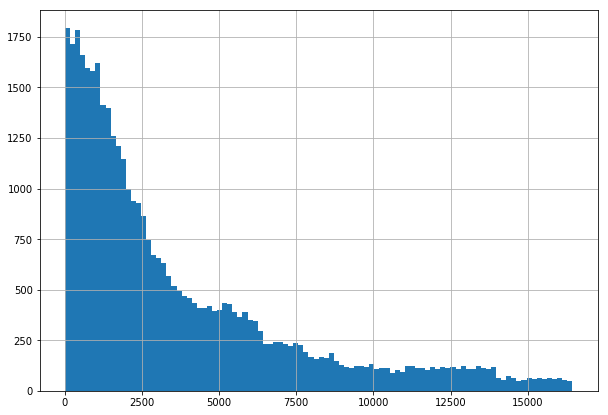

In [46]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

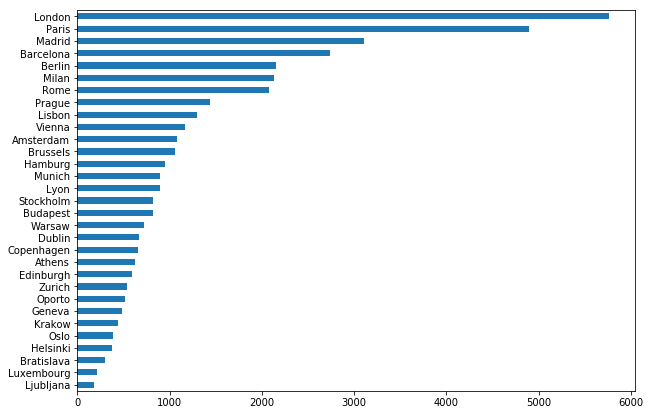

In [47]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

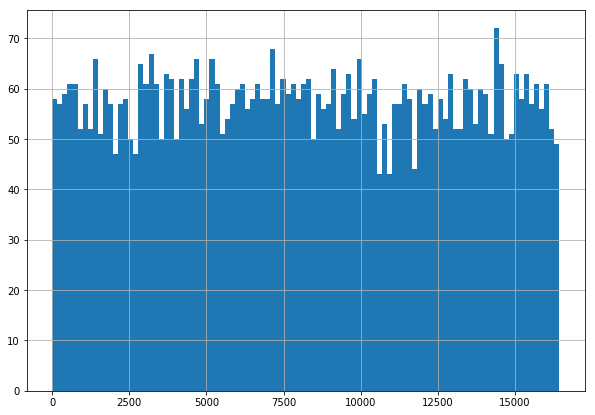

In [48]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

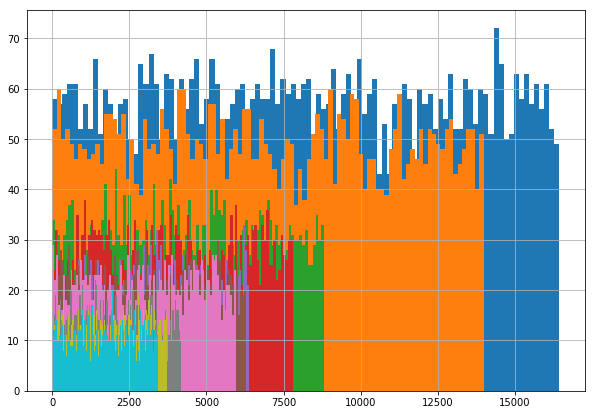

In [49]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

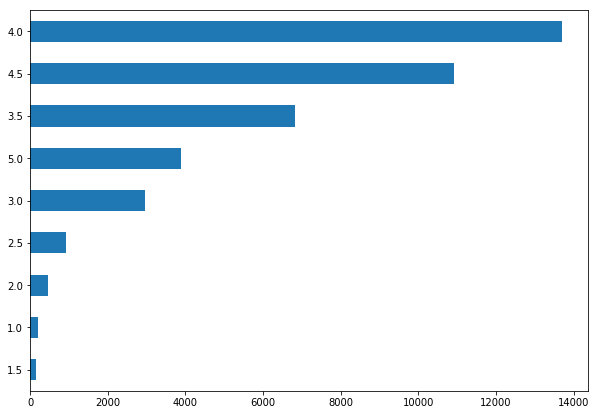

In [50]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

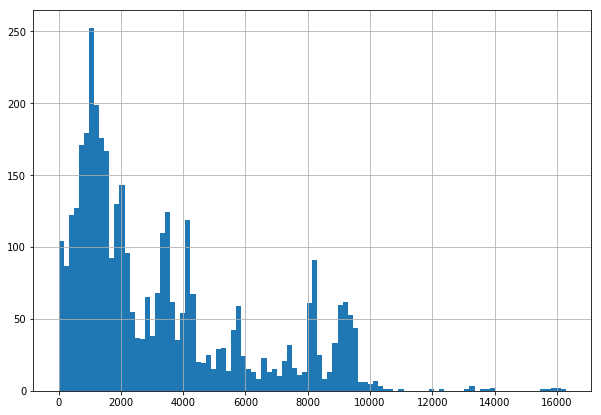

In [51]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

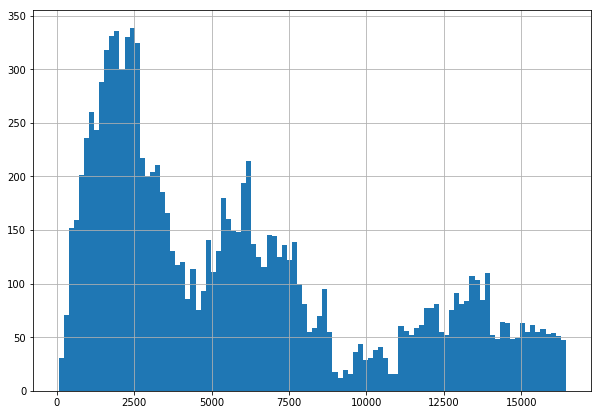

In [52]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

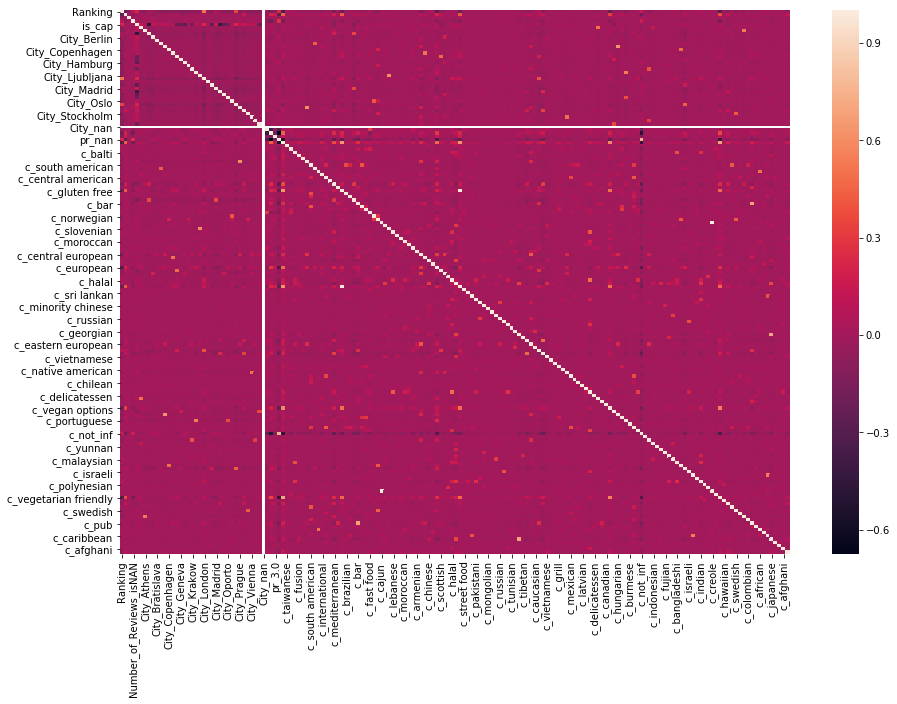

In [53]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

**Новая переменная**

Выше мы создали переменную is_cap
Тему можно было бы продолжить, и обогатить данные координатами ресторана и просмотреть, насколько они далеки от центра города - запарсить сайт ресторана, выяснить его координаты и применить функцию from geopy.distance import geodesic или haversine-формулу. Но, к сожалению, не было времени и не хватило знаний/навыков. Но я постараюсь вернуться к этому примеру после прохождения соответствующих разделов курса

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [54]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [55]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA'], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number_of_Reviews_isNAN'] = pd.isna(df_output['Number of Reviews']).astype('uint8')
    # тут ваш код по обработке NAN
    # ....
    
    
    df_output['Number of Reviews'].fillna(0, inplace=True)
    df_output['Cuisine Style'].fillna('not_inf', inplace = True) 
    df_output['Reviews'].fillna('not_inf', inplace = True)

    
    #### ---- Для формимрования признака is_cap 
    df_cap = pd.read_csv('../input/world-capitals-gps/concap.csv')
    df_cap.dropna(inplace=True)
    df_cap.drop_duplicates(subset=['CapitalName'],inplace=True)
    #### ----
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    #df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    # тут ваш код не Encoding фитчей
    # ....
    
    
   
    # Сделаем список из столиц и новое поле в data с признаком столицы
    cap_list = []
    for i in range(len(df_cap)):
        cap_list.append(df_cap.iloc[i]['CapitalName'])

    def is_cap(cell):
        if cell in cap_list:
            return 1
        else:
            return 0

    
    df_output['is_cap']=df_output['City'].apply(is_cap)

    
    
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    df_output['Number of Reviews'].fillna(0, inplace=True)
    # Создадим словарь и применим к полю ф-цию map
    dct = {'$': 1,'$$ - $$$': 2, '$$$$': 3} 
    df_output['pr']= df_output['Price Range'].map(dct)
    df_output = pd.get_dummies(df_output, columns=['pr'], dummy_na=True)
    

    import re
    pattern = re.compile('\w+\s*\w*')
    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(lambda x: pattern.findall(x))
    # Для каждой строки добавим кол-во кухонь, поддерживаемых рестораном, в cuisine_c
    df_output['cuisine_c'] = df_output['Cuisine Style'].apply(lambda x: len(x))
    
    # Пустое множество для кухонь cuisines заполним из Cuisine Style
    cuisines = set()  # создаём пустое множество для хранения уникальных значений кухонь
    for i in range(0,len(data)):
        for s in df_output.iloc[i]['Cuisine Style']:
            cuisines.add(s.lower()) # lower избавит от лишних дубликатов      

# По коллекции кухонь добавим в DataFrame поля 
    for item in cuisines:
        df_output['c_'+item]=0

    def low_item(cell):
        l = []
        for item in cell:
            l.append(item.lower())
        return l

    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(low_item)

    for itm in cuisines:
        df_output['c_'+itm]=df_output['Cuisine Style'].apply(lambda x: 1 if itm in x else 0)

    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    
    
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
                                                   
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [56]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,is_cap,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,...,c_pub,c_wine bar,c_african,c_australian,c_caribbean,c_japanese,c_salvadoran,c_welsh,c_afghani,c_soups
24630,11128.0,8.0,1,4.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37964,2012.0,10.0,1,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38389,4378.0,278.0,1,3.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19622,543.0,14.0,1,4.5,0,1,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
49752,8050.0,167.0,1,3.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19115,2774.0,7.0,1,4.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12494,1777.0,10.0,1,4.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40045,8923.0,6.0,1,4.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
898,690.0,120.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36744,1665.0,208.0,1,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 171 entries, Ranking to c_soups
dtypes: float64(3), int64(131), uint8(37)
memory usage: 52.9 MB


In [58]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [59]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [60]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 170), (40000, 170), (40000, 169), (32000, 169), (8000, 169))

# Model 
Сам ML

In [61]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [62]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [63]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [64]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.209375


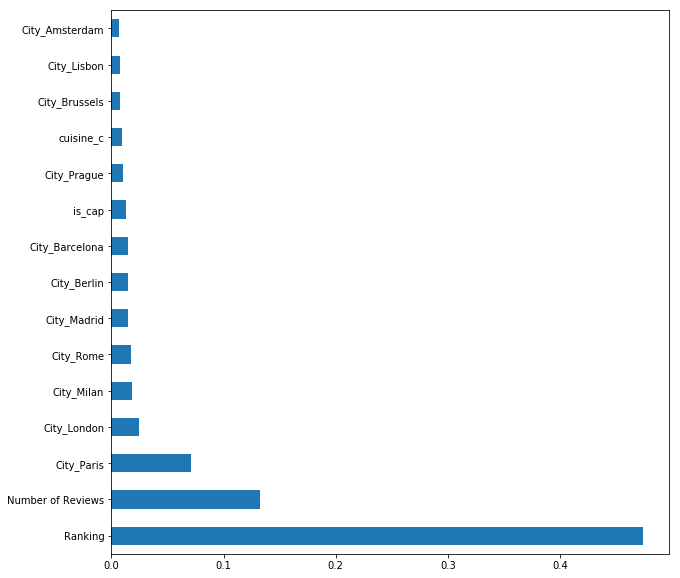

In [65]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [66]:
test_data.sample(10)

,Ranking,Number of Reviews,Rating,Number_of_Reviews_isNAN,is_cap,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,...,c_pub,c_wine bar,c_african,c_australian,c_caribbean,c_japanese,c_salvadoran,c_welsh,c_afghani,c_soups
7586,6973.0,21.0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
964,983.0,4.0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9153,4832.0,62.0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7242,2819.0,22.0,0.0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3961,386.0,1013.0,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2675,3060.0,108.0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7659,966.0,7.0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8280,490.0,233.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5967,8796.0,4.0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8617,1030.0,53.0,0.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
test_data = test_data.drop(['Rating'], axis=1)

In [68]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [69]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [70]:
predict_submission

array([2.995, 4.31 , 4.455, ..., 3.005, 4.495, 4.265])

In [71]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,2.995
1,id_1,4.310
2,id_2,4.455
3,id_3,4.330
4,id_4,4.475
5,id_5,4.690
6,id_6,2.315
7,id_7,2.670
8,id_8,4.125
9,id_9,4.710


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
